In [34]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from statistics import mean

In [35]:
results_dir = "../results"
blockdevices = os.environ["BLOCKDEVICES"].split(" ")
modes = os.environ["MODES"].split(" ")
iodepths = os.environ["IO_DEPTH"].split(" ")
jobsizes = os.environ["NUM_JOBS"].split(" ")
blocksizes = os.environ["BLOCKSIZE"].split(" ")
duration = os.environ["DURATION"]

In [36]:
def get_mean(lst):
    return "%.2f" % mean(lst)

def get_moving_avg(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

# Bandwidth Plots

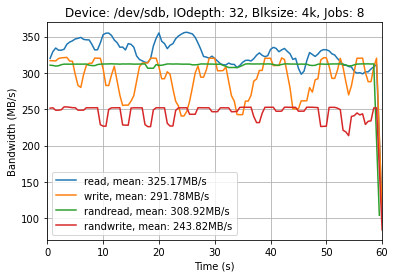

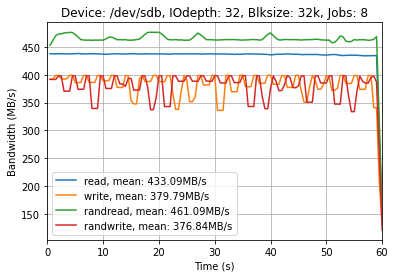

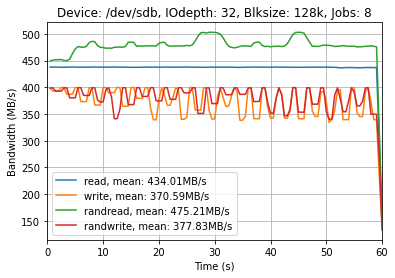

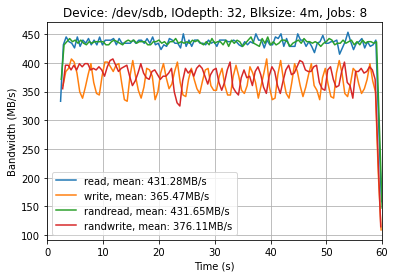

In [37]:
for blkdev in blockdevices:
    for iodepth in iodepths:
        for blksize in blocksizes:
            for jobsize in jobsizes:
                base_dir = os.path.join(f"../results/{blkdev}/{blksize}")

                for mode in modes:
                    data = defaultdict(dict)
                    for jobnum in range(1, int(jobsize) + 1):

                        time = []
                        value = []

                        with open(os.path.join(base_dir, f"{mode}-iodepth-{iodepth}-numjobs-{jobsize}_bw.{jobnum}.log"), "r") as f:
                            row = f.readlines()
                            for datapoint in row:
                                time.append(int(datapoint.split(",")[0])/1000)
                                value.append(int(datapoint.split(",")[1])/1000)

                        data[jobnum]['time'] = time
                        data[jobnum]['value'] = value

                    min_time_length = 1000000000
                    min_val_length = 1000000000

                    for jobnum in range(1, int(jobsize) + 1):
                        min_time_length = min(min_time_length, len(data[jobnum]['time']))
                        min_val_length = min(min_val_length, len(data[jobnum]['value']))

                    cum_time = []
                    cum_val = []

                    for idx in range(0, min_time_length):

                        sum_time = 0
                        for jobnum in range(1, int(jobsize) + 1):
                            sum_time += data[jobnum]['time'][idx]

                        sum_time /= int(jobsize)
                        cum_time.append(sum_time)

                        sum_val = 0
                        for jobnum in range(1, int(jobsize) + 1):
                            sum_val += data[jobnum]['value'][idx]

                        cum_val.append(sum_val)

                    moving_avg_val = list(get_moving_avg(cum_val, 3))
                    mean_val = get_mean(moving_avg_val)
                    plt.xlim(0, int(duration))
                    plt.plot(cum_time, moving_avg_val, markersize=10, linewidth=1.5, label=f"{mode}, mean: {mean_val}MB/s")

                plt.xlabel("Time (s)")
                plt.ylabel("Bandwidth (MB/s)")
                plt.title(f"Device: /dev/{blkdev}, IOdepth: {iodepth}, Blksize: {blksize}, Jobs: {jobsize}")
                plt.grid()
                plt.legend()
                plt.savefig(os.path.join(results_dir, f"./fio-bw-{blkdev}-{iodepth}-{blksize}-{jobsize}.png"), dpi=300, bbox_inches='tight')
                plt.show()

# IOPS Plots

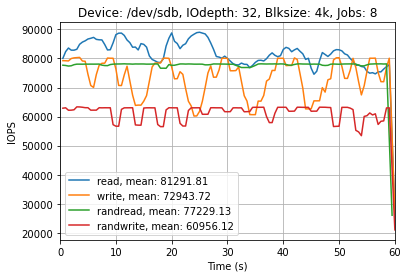

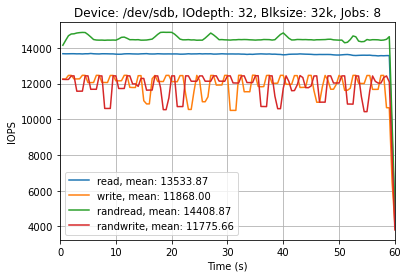

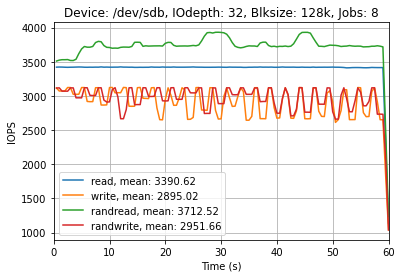

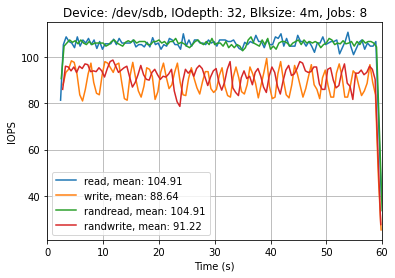

In [38]:
for blkdev in blockdevices:
    for iodepth in iodepths:
        for blksize in blocksizes:
            for jobsize in jobsizes:
                base_dir = os.path.join(f"../results/{blkdev}/{blksize}")

                for mode in modes:
                    data = defaultdict(dict)
                    for jobnum in range(1, int(jobsize) + 1):

                        time = []
                        value = []

                        with open(os.path.join(base_dir, f"{mode}-iodepth-{iodepth}-numjobs-{jobsize}_iops.{jobnum}.log"), "r") as f:
                            row = f.readlines()
                            for datapoint in row:
                                time.append(int(datapoint.split(",")[0])/1000)
                                value.append(int(datapoint.split(",")[1]))

                        data[jobnum]['time'] = time
                        data[jobnum]['value'] = value

                    min_time_length = 1000000000
                    min_val_length = 1000000000

                    for jobnum in range(1, int(jobsize) + 1):
                        min_time_length = min(min_time_length, len(data[jobnum]['time']))
                        min_val_length = min(min_val_length, len(data[jobnum]['value']))

                    cum_time = []
                    cum_val = []

                    for idx in range(0, min_time_length):

                        sum_time = 0
                        for jobnum in range(1, int(jobsize) + 1):
                            sum_time += data[jobnum]['time'][idx]

                        sum_time /= int(jobsize)
                        cum_time.append(sum_time)

                        sum_val = 0
                        for jobnum in range(1, int(jobsize) + 1):
                            sum_val += data[jobnum]['value'][idx]

                        cum_val.append(sum_val)

                    moving_avg_val = list(get_moving_avg(cum_val, 3))
                    mean_val = get_mean(moving_avg_val)
                    plt.xlim(0, int(duration))
                    plt.plot(cum_time, moving_avg_val, markersize=10, linewidth=1.5, label=f"{mode}, mean: {mean_val}")

                plt.xlabel("Time (s)")
                plt.ylabel("IOPS")
                plt.title(f"Device: /dev/{blkdev}, IOdepth: {iodepth}, Blksize: {blksize}, Jobs: {jobsize}")
                plt.grid()
                plt.legend()
                plt.savefig(os.path.join(results_dir, f"./fio-iops-{blkdev}-{iodepth}-{blksize}-{jobsize}.png"), dpi=300, bbox_inches='tight')
                plt.show()

# Latency Plots

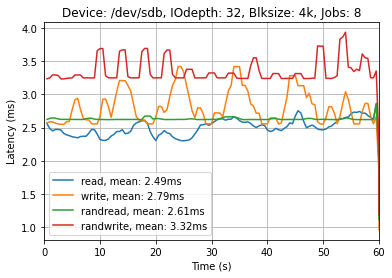

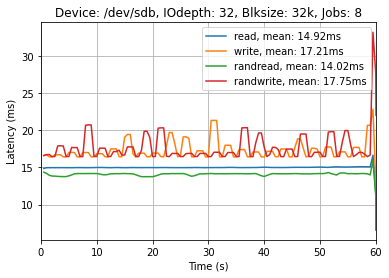

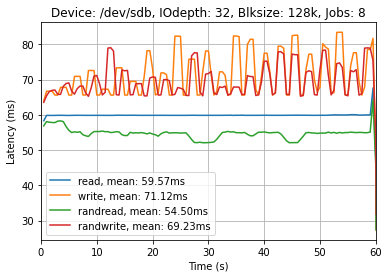

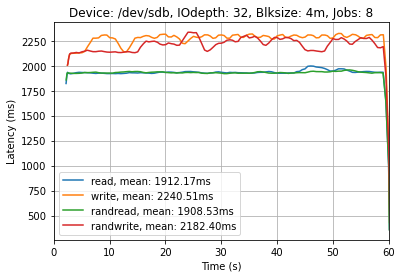

In [39]:
for blkdev in blockdevices:
    for iodepth in iodepths:
        for blksize in blocksizes:
            for jobsize in jobsizes:       
                base_dir = os.path.join(f"../results/{blkdev}/{blksize}")

                for mode in modes:
                    data = defaultdict(dict)
                    for jobnum in range(1, int(jobsize) + 1):

                        time = []
                        value = []

                        with open(os.path.join(base_dir, f"{mode}-iodepth-{iodepth}-numjobs-{jobsize}_lat.{jobnum}.log"), "r") as f:
                            row = f.readlines()
                            for datapoint in row:
                                time.append(int(datapoint.split(",")[0])/1000)
                                value.append(int(datapoint.split(",")[1])/10000000)

                        data[jobnum]['time'] = time
                        data[jobnum]['value'] = value

                    min_time_length = 1000000000
                    min_val_length = 1000000000

                    for jobnum in range(1, int(jobsize) + 1):
                        min_time_length = min(min_time_length, len(data[jobnum]['time']))
                        min_val_length = min(min_val_length, len(data[jobnum]['value']))

                    cum_time = []
                    cum_val = []

                    for idx in range(0, min_time_length):

                        sum_time = 0
                        for jobnum in range(1, int(jobsize) + 1):
                            sum_time += data[jobnum]['time'][idx]

                        sum_time /= int(jobsize)
                        cum_time.append(sum_time)

                        sum_val = 0
                        for jobnum in range(1, int(jobsize) + 1):
                            sum_val += data[jobnum]['value'][idx]

                        cum_val.append(sum_val)

                    moving_avg_val = list(get_moving_avg(cum_val, 3))
                    mean_val = get_mean(moving_avg_val)
                    plt.xlim(0, int(duration))
                    plt.plot(cum_time, moving_avg_val, markersize=10, linewidth=1.5, label=f"{mode}, mean: {mean_val}ms")

                plt.xlabel("Time (s)")
                plt.ylabel("Latency (ms)")
                plt.title(f"Device: /dev/{blkdev}, IOdepth: {iodepth}, Blksize: {blksize}, Jobs: {jobsize}")
                plt.grid()
                plt.legend()
                plt.savefig(os.path.join(results_dir, f"./fio-lat-{blkdev}-{iodepth}-{blksize}-{jobsize}.png"), dpi=300, bbox_inches='tight')
                plt.show()